#CUSTOMER CHURN DATASET:-

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [4]:
df = pd.read_csv("/content/customer_churn_dataset-training-master[1].csv")
print(df.head(10))

   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   
5         8.0  51.0    Male    33.0             25.0            9.0   
6         9.0  58.0  Female    49.0             12.0            3.0   
7        10.0  55.0  Female    37.0              8.0            4.0   
8        11.0  39.0    Male    12.0              5.0            7.0   
9        12.0  64.0  Female     3.0             25.0            2.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0 

In [6]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB
None


In [7]:
print(df.isnull().sum())


CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


In [8]:
print(df.describe())

          CustomerID            Age         Tenure  Usage Frequency  \
count  440832.000000  440832.000000  440832.000000    440832.000000   
mean   225398.667955      39.373153      31.256336        15.807494   
std    129531.918550      12.442369      17.255727         8.586242   
min         2.000000      18.000000       1.000000         1.000000   
25%    113621.750000      29.000000      16.000000         9.000000   
50%    226125.500000      39.000000      32.000000        16.000000   
75%    337739.250000      48.000000      46.000000        23.000000   
max    449999.000000      65.000000      60.000000        30.000000   

       Support Calls  Payment Delay    Total Spend  Last Interaction  \
count  440832.000000  440832.000000  440832.000000     440832.000000   
mean        3.604437      12.965722     631.616223         14.480868   
std         3.070218       8.258063     240.803001          8.596208   
min         0.000000       0.000000     100.000000          1.000000   


#EDA:-

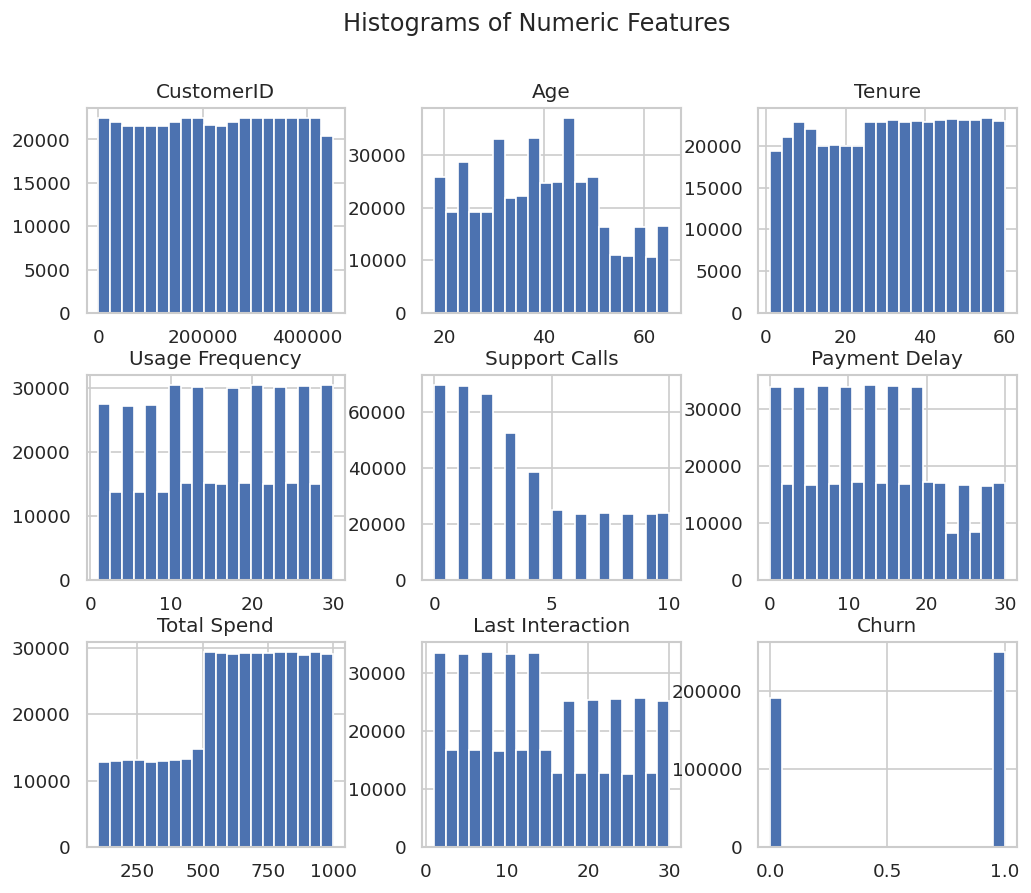

In [9]:
df.hist(figsize=(10,8), bins=20)
plt.suptitle("Histograms of Numeric Features")
plt.show()


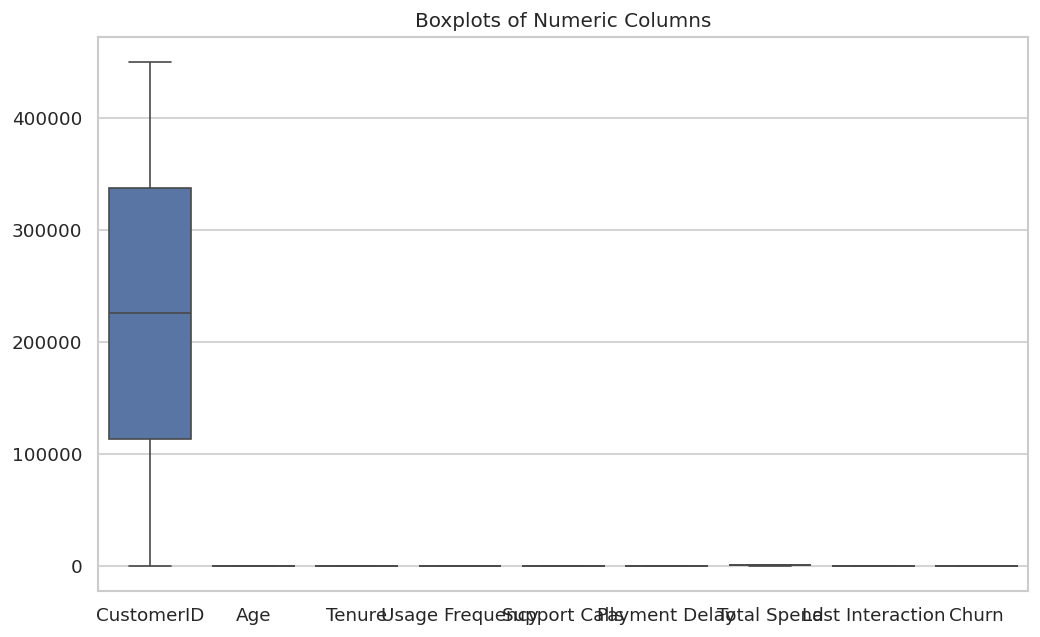

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title("Boxplots of Numeric Columns")
plt.show()


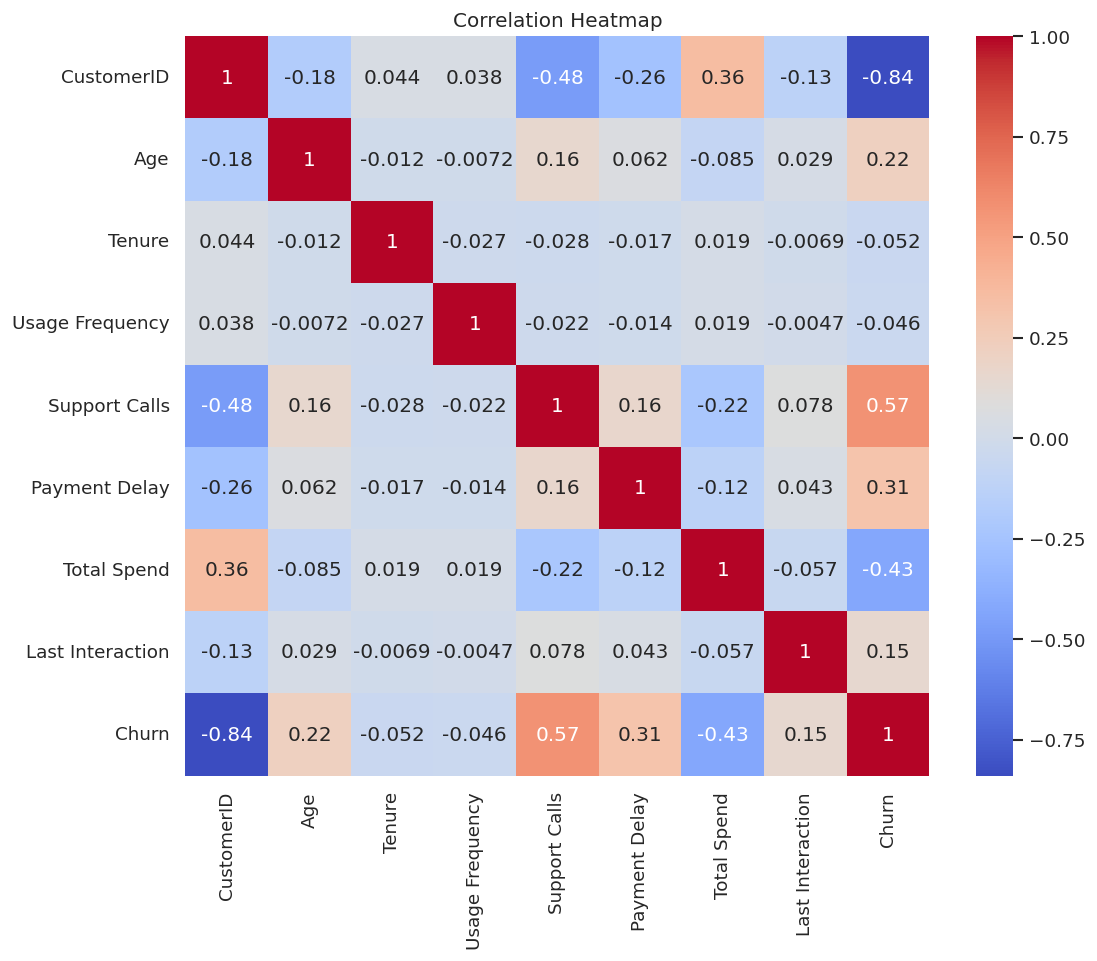

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



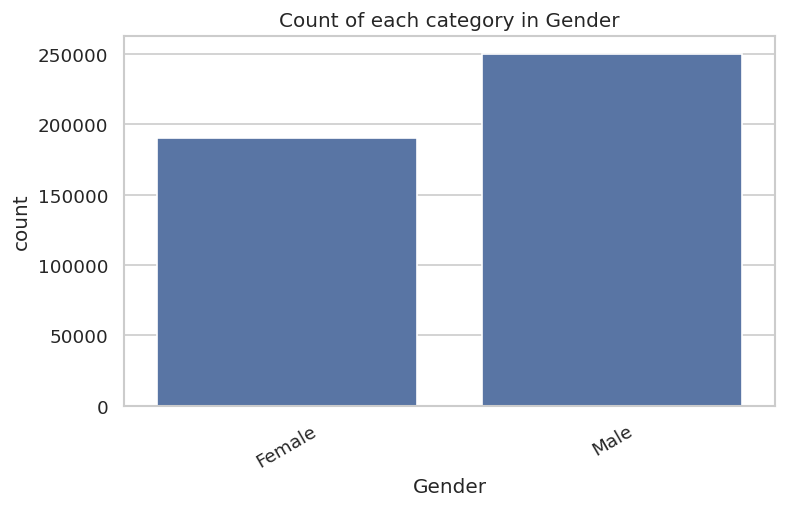

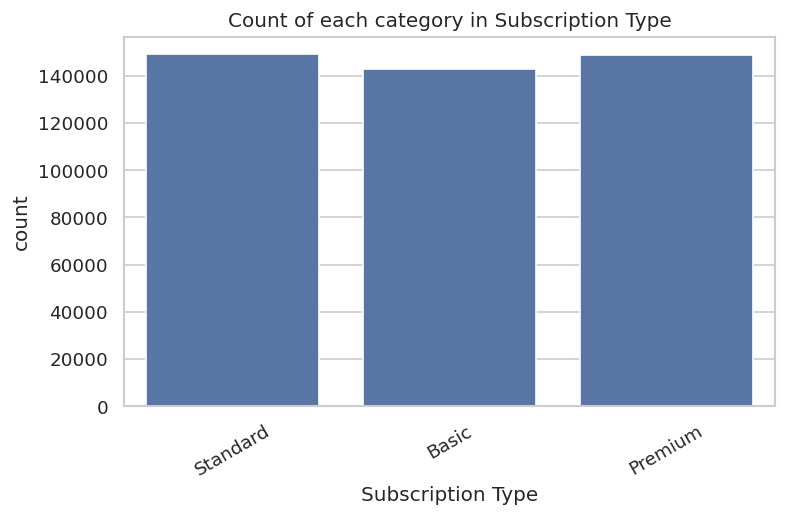

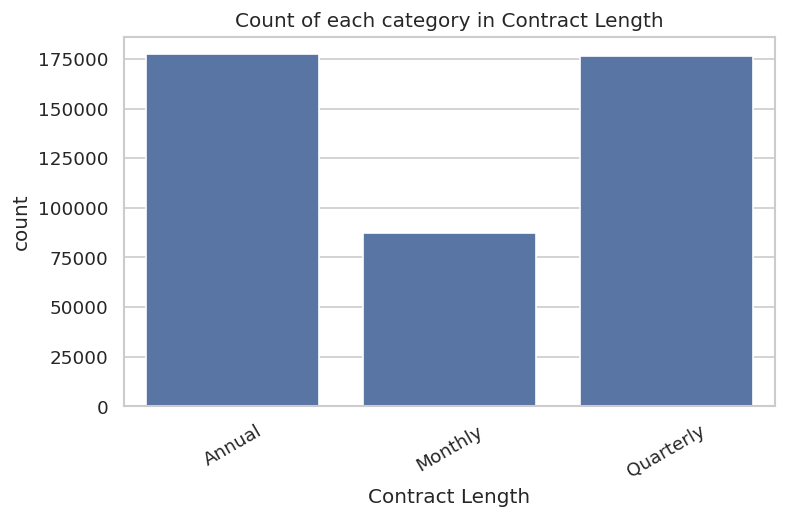

In [17]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count of each category in {col}")
    plt.xticks(rotation=30)
    plt.show()


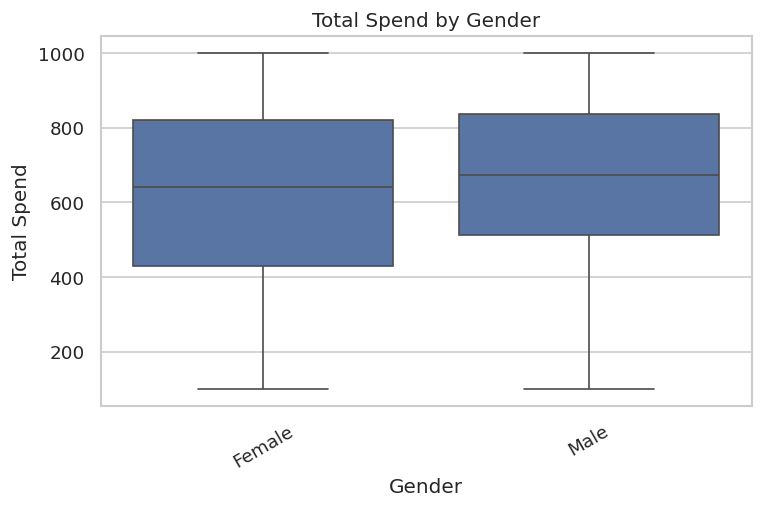

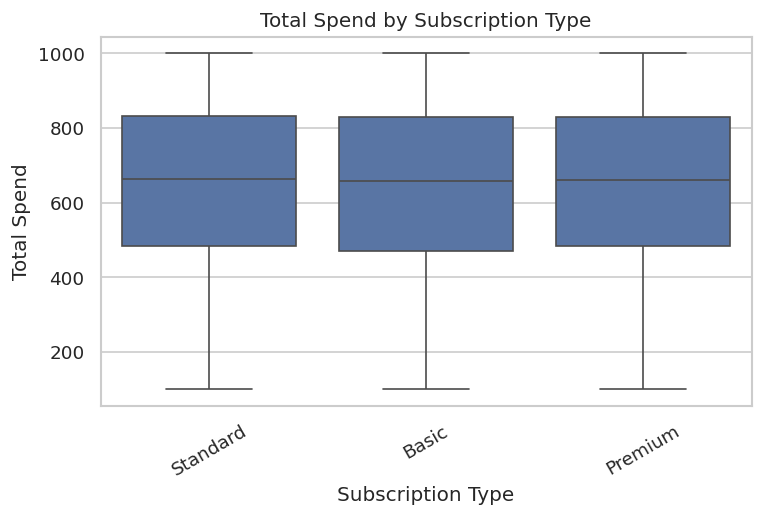

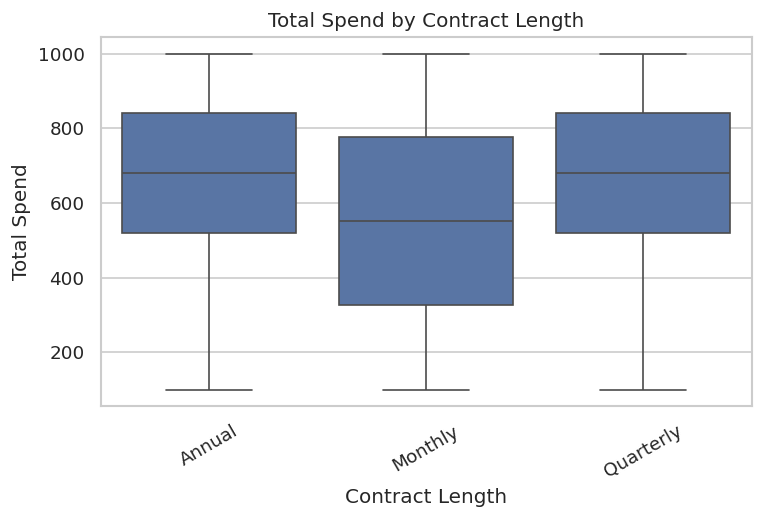

In [19]:
for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=df, x=col, y='Total Spend')
    plt.title(f"Total Spend by {col}")
    plt.xticks(rotation=30)
    plt.show()


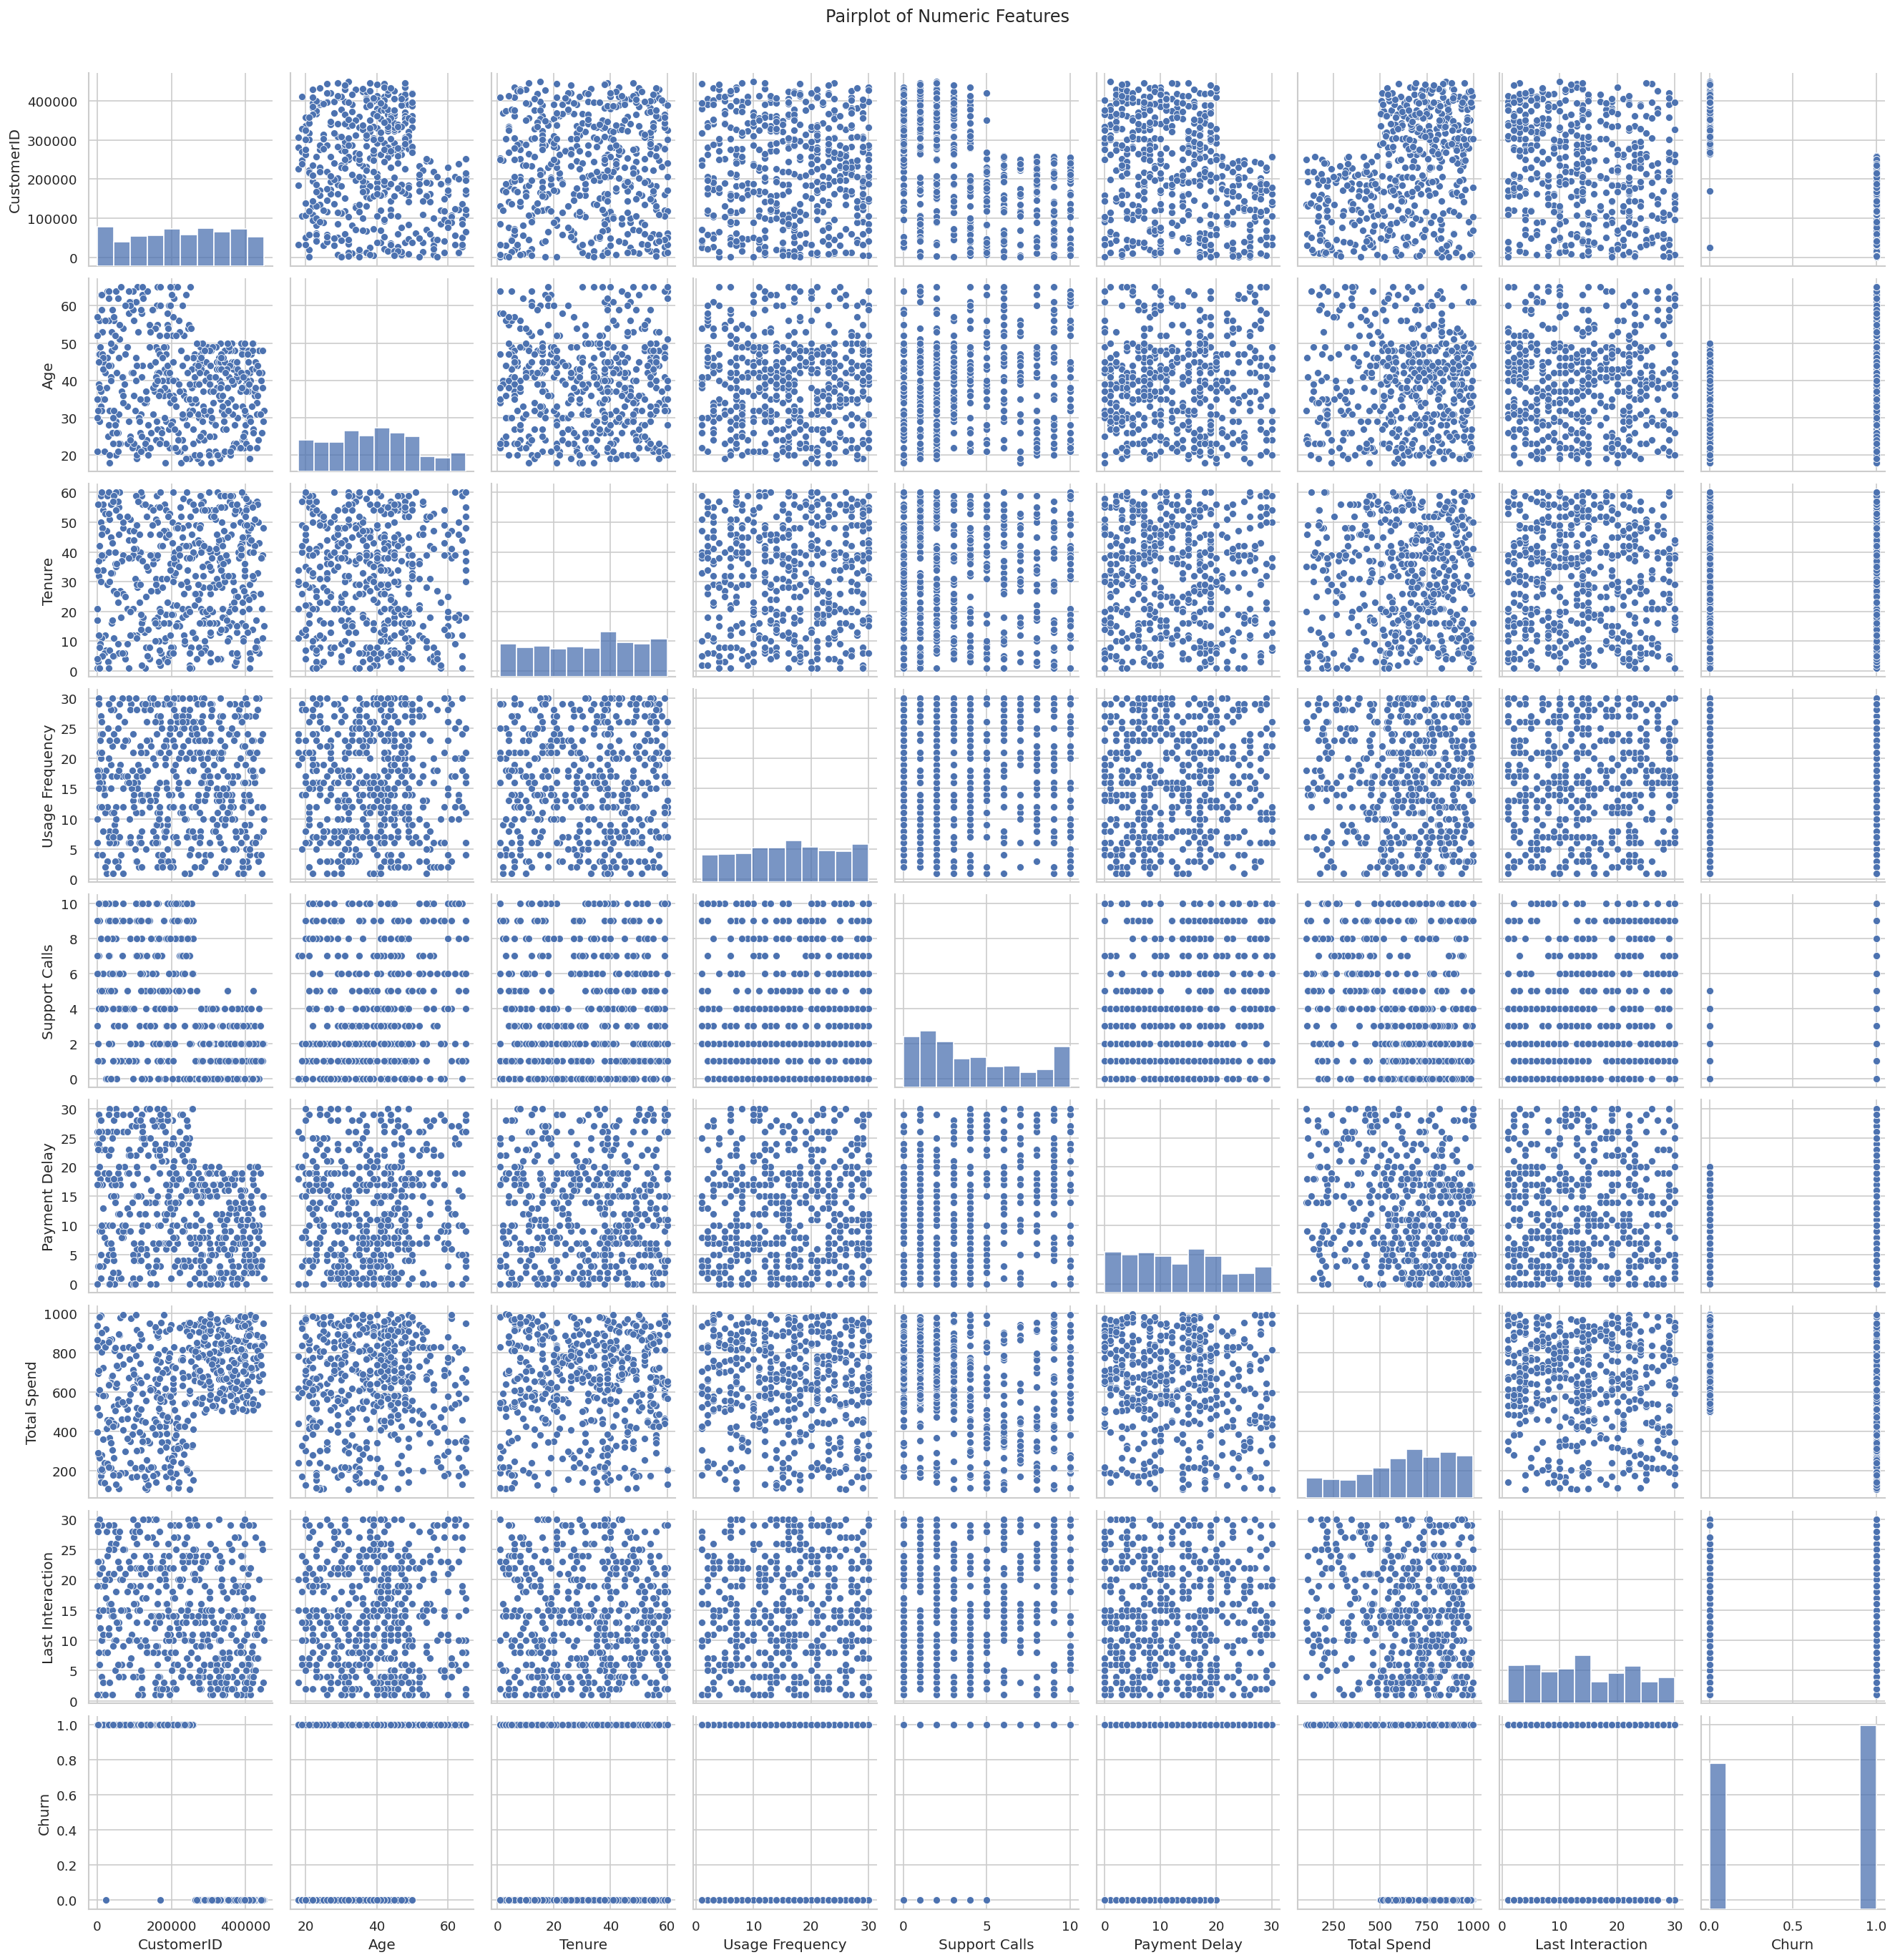

In [21]:
sns.pairplot(df.select_dtypes(include=[np.number]).sample(500))
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()



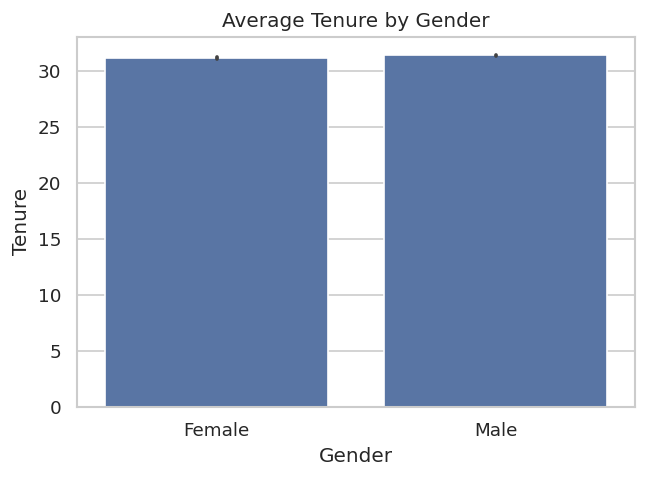

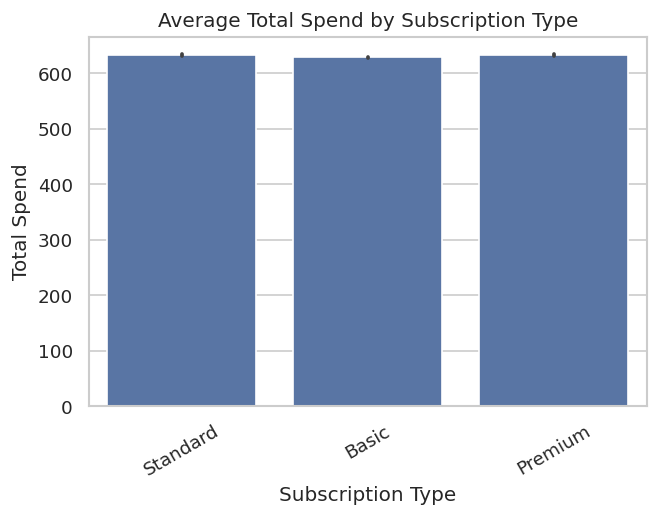

In [38]:
plt.figure(figsize=(6,4))
sns.barplot(x='Gender', y='Tenure', data=df)
plt.title("Average Tenure by Gender")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='Subscription Type', y='Total Spend', data=df)
plt.title("Average Total Spend by Subscription Type")
plt.xticks(rotation=30)
plt.show()


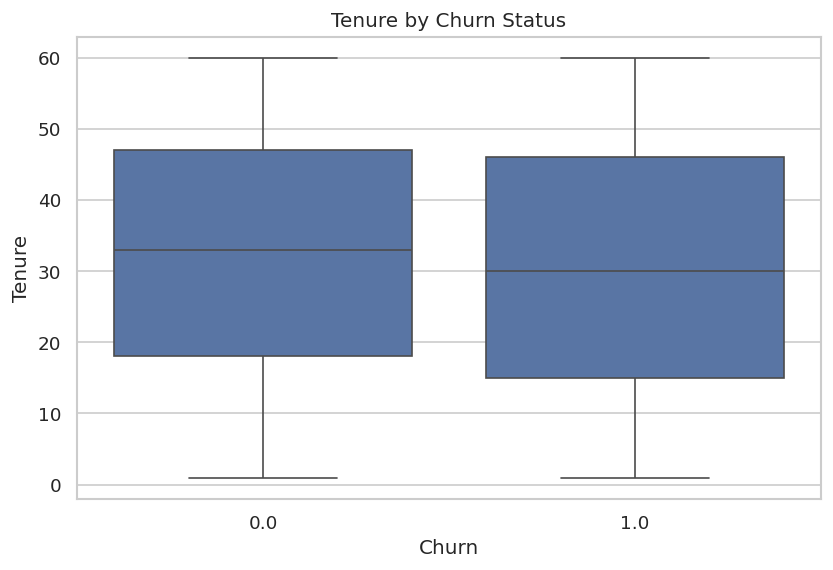

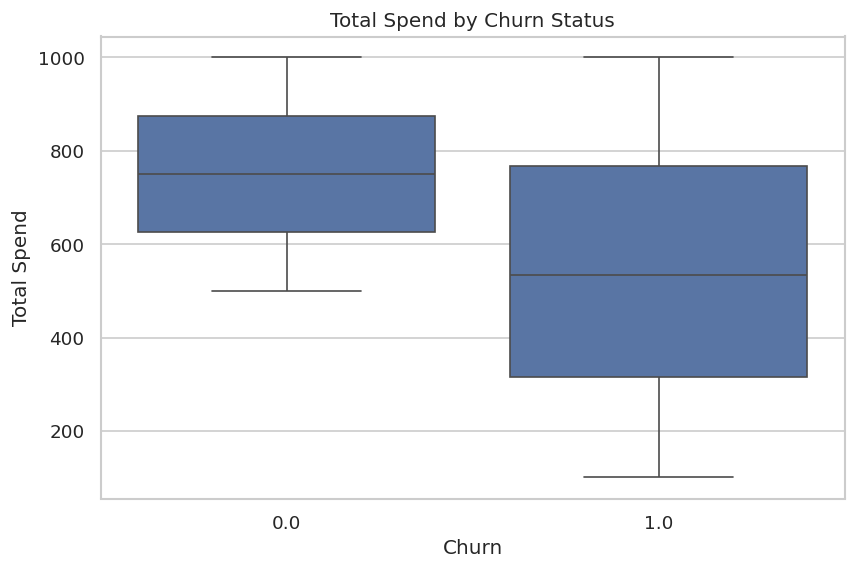

In [39]:
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title("Tenure by Churn Status")
plt.show()

sns.boxplot(x='Churn', y='Total Spend', data=df)
plt.title("Total Spend by Churn Status")
plt.show()


#Prepare Data for Simple Linear Regression:-

In [32]:
X = df[['Total Spend']]
y = df['Tenure']



In [31]:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)


Intercept: 30.404650371404227
Coefficient: [0.00136611]


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)




In [34]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [35]:
y_pred = model.predict(X_test)


In [36]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Results:")
print("Mean Squared Error:", round(mse, 2))
print("Mean Absolute Error:", round(mae, 2))
print("R² Score:", round(r2, 4))



Model Evaluation Results:
Mean Squared Error: 298.62
Mean Absolute Error: 14.93
R² Score: 0.0003


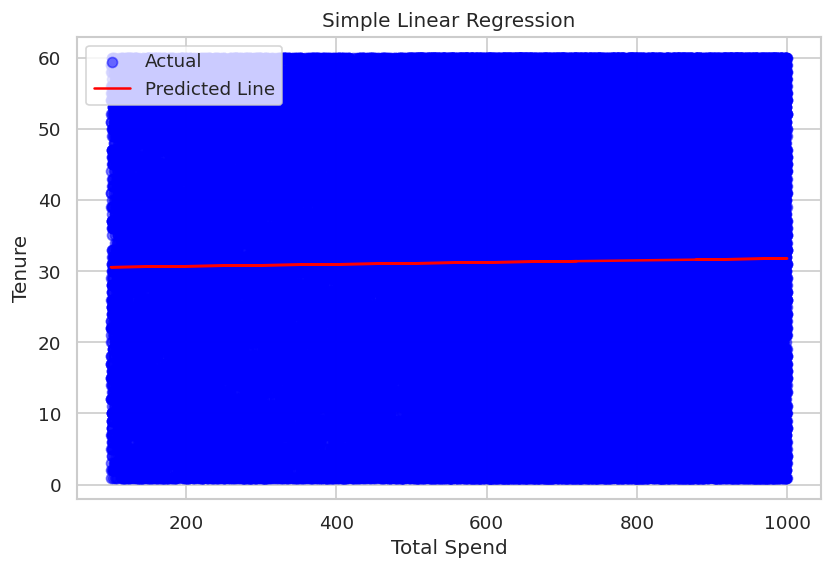

In [37]:
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted Line')
plt.xlabel('Total Spend')
plt.ylabel('Tenure')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()